## Fundamentals of Statistics Class: Exercises Solutions  
#### This notebook acts as a fill-in workbook for the exercises in Python for the Fundamentals of Statistics Workshop covering topics on data exploration and statistics. Each exercise has specific objectives split into separate labeled cell blocks. How to generate basic data summaries, histograms, boxplots, conduct hypothesis tests of mean and variance, and ANOVA are covered using the provided datasets.

In [2]:
#Import needed libraries for all exercises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.stats.api as sms
import statsmodels.api as sm

from scipy import stats

import seaborn as sns #optional for violin plot

%matplotlib inline  

---

### Exercise 0
**Business Question:** A dataset has been shared. Import that dataset and gain basic information about it by answering the following:
* How many rows and columns does it have?
* What are the names of the columns and their data types?
* Can I get the previous information with a single call?
* What does some of the data look like?
* What are some of the characteristics of the data?
* What are the value counts of a specific column?

In [4]:
#Ex0- Read the data from the excel file and create a dataframe
df = pd.read_excel("../Datasets/VAV 3-06 & 4-06 1stHalf.xlsx") #specify file path

In [5]:
#Ex0- How many rows and columns does it have?
df.shape

(58, 3)

In [6]:
#Ex0- What are the names of the columns and their data types?
df.dtypes

Start.time    datetime64[ns]
VAV Unit              object
RmTemp               float64
dtype: object

In [7]:
#Ex0- Can I get the previous information in one call?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
Start.time    58 non-null datetime64[ns]
VAV Unit      58 non-null object
RmTemp        58 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ KB


In [8]:
#Ex0- What does some of the data look like?
df.head()

,Start.time,VAV Unit,RmTemp
0,2017-03-15 07:01:00,VAVCO 3-06,73.5
1,2017-04-03 07:00:00,VAVCO 3-06,74.0
2,2017-04-04 07:04:00,VAVCO 3-06,73.0
3,2017-04-05 07:01:00,VAVCO 3-06,73.0
4,2017-04-06 07:08:00,VAVCO 3-06,73.0


In [11]:
#Ex0- What are some of the characteristics of the data?
df.describe(include='all') #specify all columns

,Start.time,VAV Unit,RmTemp
count,58,58,58.000000
unique,29,2,NaN
top,2017-06-07 07:02:00,VAVCO 3-06,NaN
freq,2,29,NaN
first,2017-03-15 07:01:00,NaN,NaN
last,2017-07-03 04:11:00,NaN,NaN
mean,NaN,NaN,73.862069
std,NaN,NaN,1.107364
min,NaN,NaN,73.000000
25%,NaN,NaN,73.000000


In [12]:
#Ex0- What are the value counts of a specific column?
df['RmTemp'].value_counts() #Get value counts for RmTemp

73.0    24
74.0    11
73.5     8
74.5     5
75.0     5
75.5     3
78.0     2
Name: RmTemp, dtype: int64

---

### Exercise 1
**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.
* Create a histogram to visualize the overall distribution of tolerances over the entire part
* Evaluate the effect of bin size on result
* Using histograms for each location, assess the location effect of the tolerance measurements

In [13]:
#Ex1- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Tolerance Stack.xlsx') #add file path
df.head()

,LOC,TOL
0,LOC 01,0.040200
1,LOC 02,0.037800
2,LOC 03,0.049933
3,LOC 04,0.036733
4,LOC 05,0.030467


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facd9e69438>]],
      dtype=object)

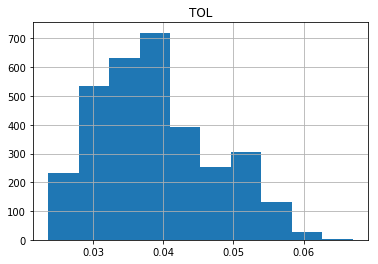

In [14]:
#Ex1- Create a histogram to visualize the overall distribution of tolerances over the entire part
df.hist() #plots histogram for numeric columns; tolerance is the only one in this dataframe 

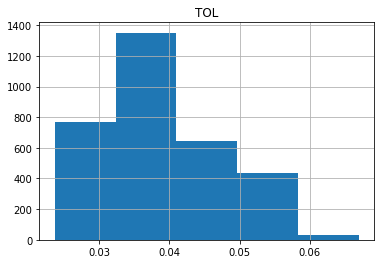

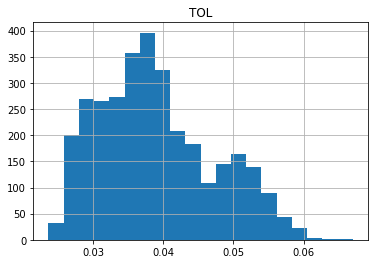

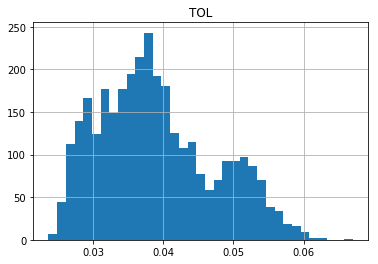

In [17]:
#Ex1- Evaluate the effect of bin size on result
for b in range(5,40,15): #iterates over range of bin sizes
    df.hist(bins=b) #specify bin size

In [ ]:
#Ex1- Using histograms for each location, assess the location effect of the tolerance measurements
df['TOL'].hist(by=df['<add here>'],'<add here>') #group by location and use same x and y axes
plt.show() #added to reduce messages in output

---

### Exercise 2
**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.
* Create a boxplot to visualize the overall distribution of tolerances over the entire part
* Using boxplots for each location, assess the location effect of the tolerance measurements

In [ ]:
#Ex2- Data was already read from the excel file and a dataframe called df created in Ex1
df.'<add here>' #inspect beginning of df

In [ ]:
#Ex2- Create a Boxplot to visualize the overall distribution of tolerances over the entire part
df.boxplot(showmeans=True,grid=False) #plots boxplot for numeric columns; tolerance is the only one in this dataframe 

In [ ]:
#Ex2- Using boxplots for each location, assess the location effect of the tolerance measurements
df.boxplot(by='<add here>',figsize=(12,8),showmeans=True,grid=False) #subplots by location

---

### Exercise 3
**Business Question:** Historically, metal elongation has averaged 2% ($\mu_0=2$) with a known $\sigma^2=0.03$. Examine the current data set (Elongation.xlsx) to determine if the mean elongation has increased from its historically expected value.
* Conduct a one-sided z-test at $\alpha=.05$ to evaluate the null and alternate hypotheses:
$$
H_0 : \mu \le \mu_0 \\
H_a : \mu > \mu_0
$$

In [ ]:
#Ex3- Read the data from the excel file and create a dataframe
df = '<add here>'('../Datasets/Elongation.xlsx') #read Excel file
df.head()

In [ ]:
#Ex3- Visualize the data as a boxplot
'<add here>' #create boxplot

In [ ]:
#Ex3 - Conduct a one-sided z-test 
mu0 = 2
n = df.shape['<add here>'] #get number of rows

zscore = (df['Elongation'].mean() - mu0) / (np.sqrt(.03/n))
pvalue = 1-stats.norm.cdf(abs(zscore)) #if this was a 2-sided test, we would multiply this by 2
'<add here>'('Z-score: %.4f' %zscore) #display formatted value
'<add here>'('p-value: %.4f' %pvalue) #display formatted value


**Interpretation:** Since $p<.05$, we reject $H_0$ at the $\alpha=.05$ level. There is sufficient evidence to show that the mean elongation is greater than 2 percent.

---

### Exercise 4
**Business Question:** Coating thickness of tablets in a drug manufacturing process (Thickness.xlsx) must meet a specification of $\mu=40$. $\sigma^2$ is assumed to be *UNKNOWN*. 
* Conduct a hypothesis test at $\alpha$ = 0.05 (95% confidence interval) to determine if $H_0$: $\mu$=40 is an acceptable hypothesis:
$$
H_0: \mu=\mu_0 \\
\text{vs}\\
H_a: \mu \ne \mu_0
$$

In [ ]:
#Ex4- Read the data from the excel file and create a dataframe
df = '<add here>' #read file with path: ../Datasets/Thickness.xlsx
df.head()

In [ ]:
#Ex4- Conduct a hypothesis test
stats.ttest_1samp('<add here>')

---

### Exercise 5: 
**Business Question:** We want to determine information about the mean coating thickness of tablets in a drug manufacturing process (Thickness.xlsx).
* Construct a 95% confidence interval (range of values for which we can be 95% certain contain the true mean of the tablets, $\mu$);  $\sigma^2$ is assumed to be *UNKNOWN*.

In [ ]:
#Ex5- Data was already read from the excel file and a dataframe called df created in Ex4
df.head()

In [ ]:
#Ex5- Construct a 95% confidence interval
mean,var,stdev = stats.bayes_mvs(
    data = '<add here>', 
    alpha= '<add here>'
)

mean

---

### Exercise 6
**Business Question:** Batch yield data (Tanks Stacked.xlsx) has been gathered from two reactor tanks in a chemical production process. We will test whether the Tanks produce the same mean yields after we do a comparison of the variances.
* Visually compare the tank data. Give some visual conclusions/conjectures
* Test the hypothesis that the variances are the same for both tanks
* Conduct the hypothesis test that the mean yields are the same

In [ ]:
#Ex6- Read the data from the excel file and create a dataframe
#File path: '../Datasets/Tanks Stacked.xlsx'
df = '<add here>'
df.head()

In [ ]:
#Ex6- Visually compare the tank data
df.'<add here>'(
    column='<add here>',
    by='<add here>',
    showmeans=True,
    grid=False,
    figsize=(8,6)
)

In [ ]:
#Ex6- Test the hypothesis that the variances are the same for both tanks

TankA = df['Tank'] == 'Tank A' #indicies for Tank A observations
TankB = df['Tank'] == 'Tank B' #indicies for Tank B observations

#Manually calculate the F statistic and degrees of freedom

F = np.var(df['<add here>']['Yield'])/np.'<add here>'(df['<add here>']['Yield'])
df1 = len(df['<add here>']['<add here>']) - 1
df2 = len(df['<add here>']['<add here>']) - 1

#Calculate the p-value based on the F distribution
pvalue = stats.f.cdf(F, df1, df2)

#Does the CDF calculate a one- or two-tailed probability? 
#pvalue = 2*pvalue   #uncomment if stats.f.cdf returns one-tailed probability

#Print results
print('p-Value = %.4f' % pvalue)
print('F Test = %.4f' % F)

In [ ]:
#Ex6- Conduct the hypothesis test that the mean yields are the same
stats.ttest_ind(
    a = '<add here>',  #first sample
    b = '<add here>',  #second sample
    equal_var = '<add here>'
)

---

### Exercise 7
**Business Question:** 20 daily weight measurements are taken from metal production at two plants (Weights.xlsx). Are the mean daily weights from the plants different?

* Visually compare the North and South Plant weight data. Give some visual conclusions/conjectures.
* Test the hypothesis that the variances are the same for both plants. 
* Conduct the hypothesis test that the mean weights are the same  Η<sub>0</sub>: μ<sub>A</sub> - μ<sub>B</sub> = 0 vs Η<sub>1</sub>: μ<sub>A</sub> - μ<sub>B</sub> ≠ 0, assuming  unknown σ<sup>2</sup><sub>A</sub> ≠ σ<sup>2</sup><sub>B</sub>)


In [ ]:
#Ex7- Read the data from the excel file and create a dataframe
#File path: '../Datasets/Weights.xlsx'
df = '<add here>'
df.head()

In [ ]:
#Ex7- Visually compare the North and South Plant weight data
'<add here>'

In [ ]:
#Ex7- Test the hypothesis that the variances are the same for both plants
North = df['Location'] == 'North'  
South = df['Location'] == 'South'

#Manually calculate the F statistic and degrees of freedom
F = '<add here>'
df1 = '<add here>'
df2 = '<add here>'

#Calculate the p-value based on the F distribution
pvalue = '<add here>'

#Print results
print('p-Value = %.4f' % pvalue)
print('F Test = %.4f' % F)

In [ ]:
#Ex7- Conduct the hypothesis test that the mean weights are the same
stats.ttest_ind(
    a = '<add here>',
    b = '<add here>',
    equal_var = '<add here>' 
)

---

### Exercise 8: 
**Business Question:** We want to look at the relationship between velocity and strength in our welding data (Welding.xlsx).
* Plot welding data as a scatterplot
* Fit a regression line to determine if the regression coefficients are statistically significant. Fit "Strength" by "Velocity".

In [ ]:
#Ex8- Read the data from the excel file and create a dataframe
#File path: '../Datasets/Weights.xlsx'
df = '<add here>'
df.head()

In [ ]:
#Ex8- Plot welding data as a scatterplot
plt.scatter(
    x = '<add here>',
    y = '<add here>'
)

In [ ]:
#Ex8- Fit a regression line to determine if the regression coefficients are statistically significant.

#Since the raw values don't contain a constant term, create a copy of the dataset with a constant
x = df['velocity'].copy()
x = sm.add_constant(x)

mod = sm.OLS(
    endog = '<add here>',   #Endogeneous = dependent variable(s)
    exog =  '<add here>'    #Exogeneous = independent variable(s)
).fit()          #.fit() needed to actually fit the data in Statsmodels

#Print results
print(mod.summary())

In [ ]:
#Ex8- Fit a regression line to determine if the regression coefficients are statistically significant.
#BONUS: Plot regression line with confidence intervals

from statsmodels.sandbox.regression.predstd import wls_prediction_std

#Generate prediction and confidence band
prstd, iv_l, iv_u = wls_prediction_std(mod)

#Make figure
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x['velocity'], df['strength'], 'o', label="data")
ax.plot(x['velocity'], mod.fittedvalues, 'r--', label="OLS")
ax.fill_between(x['velocity'], y1=iv_l, y2=iv_u, color='gray', alpha=.2, label='95%CI')
ax.legend(loc='upper left')

plt.xlabel('Velocity')
plt.ylabel('Strength')
plt.show()

---

### Exercise 9
**Business Question:** Machine tolerance data (MachineTol.xlsx) was measured on a part at 5 locations: L1-L5. Conduct an analysis of variance of machine tolerance to determine if the population means associated with locations L1-L5 are the same or are different.
* Plot machine tolerance by location
* Show the results of an ANOVA and provide the conclusion to the hypothesis test
* Conduct a multiple comparison test to determine what pairs might be different using the All Pairs Tukey-Kramer HSD method. What means are different or not?
* Conduct a multiple comparison test to determine if a location exists that exhibits the best (lowest) mean tolerance using the Compare Best, Hsu MCB method. Are any of the means "best"?

In [ ]:
#Ex9- Read the data from the excel file and create a dataframe
#File path: '../Datasets/MachineTol.xlsx'
df = '<add here>'
df.head()

In [ ]:
#Ex9- Visually compare machine tolerance by location
'<add here>'

In [ ]:
#Ex9- Visually compare machine tolerance by location
#BONUS: Use a violinplot
sns.violinplot(
    data=df,
    x='Location',
    y='Mach Tol'
)


In [ ]:
#Ex9- Show the results of an ANOVA and provide the conclusion to the hypothesis test

#Spaces can be a hassle, so renaming columns can be helpful
df.rename(index=str, columns={"Mach Tol":"MachTol"}, inplace=True)

#Statsmodels can use R-style formulas: y ~ x1 + C(x2) + ...
#In that formula, [y, x1, x2] are column names and 'C(x2)' means 'treat x2 as categorical'

formula = '<add here>'

#Generate the fitted model
model = sm.formula.ols(
    formula = '<add here>',   #Note: this is an argument, not the variable name
    data = '<add here>'
).fit()

#Print the ANOVA table
aov_table = sms.anova_lm(model)
print(aov_table)

In [ ]:
#Ex9- Conduct a multiple comparison test to determine what pairs might be different using the All Pairs 
#Tukey-Kramer HSD method

res = sms.multicomp.pairwise_tukeyhsd(
    endog= '<add here>',
    groups='<add here>'
)

#Print a summary of the pairwise p-values
print(res.summary())

#Visually inspect confidence intervals
res.plot_simultaneous(xlabel='Friction')
plt.show()

In [ ]:
#Ex9- To find the best location with Hsu's MCB method use JMP instead